In [60]:
from model import model
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [61]:
model = model

In [62]:
class Batsman(TypedDict):
    run : int
    balls : int
    fours: int
    sixes : int

    sr: float
    bpb: float
    boundary_percent : float
    summary : str

In [63]:
def cal_sr(state: Batsman):

    sr = (state['run'] / state['balls']) * 100    
    
    return {'sr':sr}

In [64]:
def cal_bpb(state: Batsman):

    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'bpb': bpb}

In [65]:
def cal_boundary_percent(state: Batsman):

    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['run'])*100


    return {'boundary_percent' : boundary_percent}

In [66]:
def summary(state: Batsman):

    summary = f"""
        Strike Rate - {state['sr']} \n
        Balls per boundary - {state['bpb']} \n
        Boundary percent - {state['boundary_percent']}
    """

    state['summary'] = summary
    return state

In [67]:
graph = StateGraph(Batsman)

graph.add_node('cal_sr', cal_sr)
graph.add_node('cal_bpb', cal_bpb)
graph.add_node('cal_boundary_percent', cal_boundary_percent)
graph.add_node('summary', summary)

# edges
graph.add_edge(START, 'cal_sr')
graph.add_edge(START, 'cal_bpb')
graph.add_edge(START, 'cal_boundary_percent')
graph.add_edge('cal_sr', 'summary')
graph.add_edge('cal_bpb', 'summary')
graph.add_edge('cal_boundary_percent', 'summary')
graph.add_edge('summary', END)

In [68]:
workflow = graph.compile()

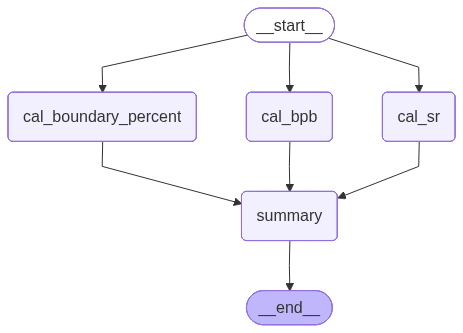

In [69]:
workflow

In [70]:
initial_state = {
    'run':100,
    'balls':50,
    'fours':6,
    'sixes':4
}

In [71]:
workflow.invoke(initial_state)

{'run': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\n        Strike Rate - 200.0 \n\n        Balls per boundary - 5.0 \n\n        Boundary percent - 48.0\n    '}